In [108]:
"DATA PREPARATION" 

'DATA PREPARATION'

In [109]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
# Importing the dataset
df = pd.read_excel('kr2.xlsx', encoding='ISO-8859-1')
df

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.5,7.7,3.23,106.0,12.1,69.0,0
1,32,m,38.5,70.3,18.0,4.80,74.0,15.6,76.5,0
2,32,m,46.9,74.7,36.2,5.20,86.0,33.2,79.3,0
3,32,m,43.2,52.0,30.6,4.74,80.0,33.8,75.7,0
4,32,m,39.2,74.1,32.6,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,6.30,55.7,650.9,68.5,1
611,64,f,24.0,102.8,2.9,3.02,63.0,35.9,71.3,1
612,64,f,29.0,87.3,3.5,3.63,66.7,64.2,82.0,1
613,46,f,33.0,NaN,39.0,4.20,52.0,50.0,71.0,1


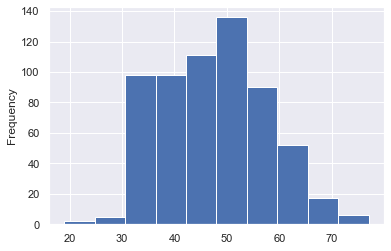

In [111]:
# Age distribution
df['Age'].plot(kind = 'hist')

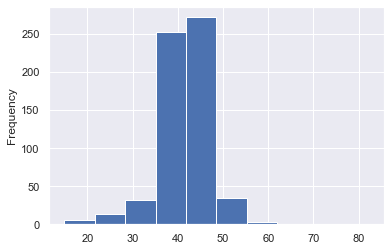

In [112]:
# ALB distribution
df['ALB'].plot(kind = 'hist')

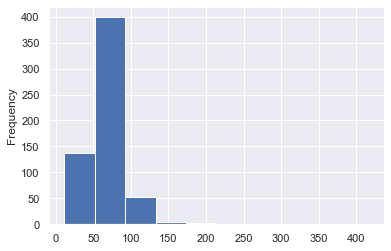

In [113]:
# ALP distribution
df['ALP'].plot(kind = 'hist')

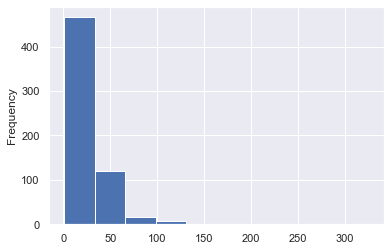

In [114]:
# ALT distribution
df['ALT'].plot(kind = 'hist')

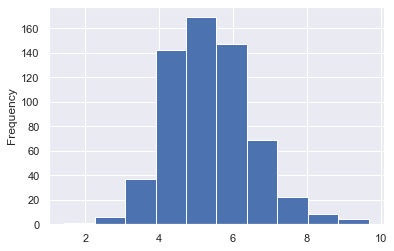

In [115]:
# CHOL distribution
df['CHOL'].plot(kind = 'hist')

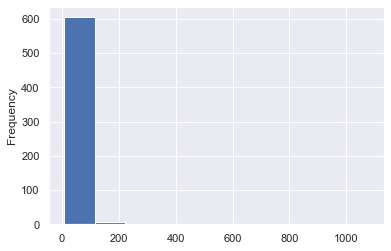

In [116]:
# CREA distribution
df['CREA'].plot(kind = 'hist')

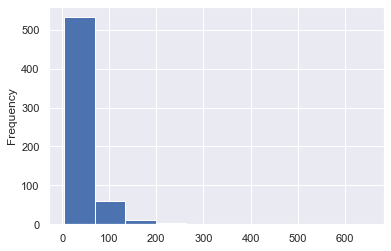

In [117]:
# GGT distribution
df['GGT'].plot(kind = 'hist')

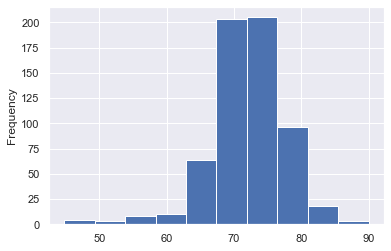

In [118]:
# PROT distribution
df['PROT'].plot(kind = 'hist')

In [119]:
# Cheking NaN
# Видим, что пропущенные значения присутствуют в переменных ALB, ALP, ALT, CHOL, PROT
nan_by_column=df.isnull().sum()
print(nan_by_column)

Age          0
Sex          0
ALB          1
ALP         18
ALT          1
CHOL        10
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64


In [120]:
# Taking care of missing data
# Избавимся от отствующих значений заменив их на средние значения
from sklearn.impute import SimpleImputer
df[['ALB']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALB']])
df[['ALP']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALP']])
df[['ALT']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALT']])
df[['CHOL']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['CHOL']])
df[['PROT']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['PROT']])

In [121]:
df

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
0,32,m,38.5,52.50000,7.7,3.23,106.0,12.1,69.0,0
1,32,m,38.5,70.30000,18.0,4.80,74.0,15.6,76.5,0
2,32,m,46.9,74.70000,36.2,5.20,86.0,33.2,79.3,0
3,32,m,43.2,52.00000,30.6,4.74,80.0,33.8,75.7,0
4,32,m,39.2,74.10000,32.6,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.60000,5.9,6.30,55.7,650.9,68.5,1
611,64,f,24.0,102.80000,2.9,3.02,63.0,35.9,71.3,1
612,64,f,29.0,87.30000,3.5,3.63,66.7,64.2,82.0,1
613,46,f,33.0,68.28392,39.0,4.20,52.0,50.0,71.0,1


In [122]:
df.describe()

,Age,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,5.368099,81.287805,39.533171,72.044137,0.133333
std,10.055105,5.775920,25.643955,25.448940,1.123466,49.756166,54.661071,5.398234,0.340211
min,19.000000,14.900000,11.300000,0.900000,1.430000,8.000000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,52.950000,16.400000,4.620000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,5.310000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,6.055000,88.000000,40.200000,75.400000,0.000000
max,77.000000,82.200000,416.600000,325.300000,9.670000,1079.100000,650.900000,90.000000,1.000000


In [123]:
#  Исходя из графиков распределения и таблицы статических показателей,видим, что в некоторых
# переменных (ALB,ALP,ALT,CREA,GGT) присутствуют выбросы
# "Загоним" все значения в три сигма
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for ALB in num_var:
        df[ALB] = df[ALB].apply(lambda y: df[ALB].mean()-3*df[ALB].std() 
                            if y < df[ALB].mean()-3*df[ALB].std() else y)
        df[ALB] = df[ALB].apply(lambda y: df[ALB].mean()+3*df[ALB].std() 
                            if y > df[ALB].mean()+3*df[ALB].std() else y)
    for ALP in num_var:
        df[ALP] = df[ALP].apply(lambda y: df[ALP].mean()-3*df[ALP].std() 
                            if y < df[ALP].mean()-3*df[ALP].std() else y)
        df[ALP] = df[ALP].apply(lambda y: df[ALP].mean()+3*df[ALP].std() 
                            if y > df[ALP].mean()+3*df[ALP].std() else y) 
    for ALT in num_var:
        df[ALT] = df[ALT].apply(lambda y: df[ALT].mean()-3*df[ALT].std() 
                            if y < df[ALT].mean()-3*df[ALT].std() else y)
        df[ALT] = df[ALT].apply(lambda y: df[ALT].mean()+3*df[ALT].std() 
                            if y > df[ALT].mean()+3*df[ALT].std() else y) 
    for CREA in num_var:
        df[CREA] = df[CREA].apply(lambda y: df[CREA].mean()-3*df[CREA].std() 
                            if y < df[CREA].mean()-3*df[CREA].std() else y)
        df[CREA] = df[CREA].apply(lambda y: df[CREA].mean()+3*df[CREA].std() 
                            if y > df[CREA].mean()+3*df[CREA].std() else y)
    for GGT in num_var:
        df[GGT] = df[GGT].apply(lambda y: df[GGT].mean()-3*df[GGT].std() 
                            if y < df[GGT].mean()-3*df[GGT].std() else y)
        df[GGT] = df[GGT].apply(lambda y: df[GGT].mean()+3*df[GGT].std() 
                            if y > df[GGT].mean()+3*df[GGT].std() else y)    
        
    return(df)

In [124]:
# Outliers
df = outliers(df)
df.describe()

,Age,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.636426,67.485539,26.522075,5.365057,78.407848,34.595895,72.134702,0.133333
std,10.055105,5.267459,20.190873,15.247022,1.106919,15.655805,29.119238,5.031554,0.340211
min,19.000000,25.832629,11.300000,0.900000,2.044296,31.411085,4.500000,57.039034,0.000000
25%,39.000000,38.800000,52.950000,16.400000,4.620000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,5.310000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,6.055000,88.000000,40.200000,75.400000,0.000000
max,77.000000,57.438924,128.062025,72.539305,8.685818,125.399153,123.225026,87.229378,1.000000


In [125]:
# Исходя из графиков распределения, видим, что переменные ALT, CREA и GGT имеют ненормальное распределение.
# Прологарифмируем их
df['ALT'] = np.log(df['ALT'])
df['CREA'] = np.log(df['CREA'])
df['GGT'] = np.log(df['GGT'])

C:\Users\ztnik\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


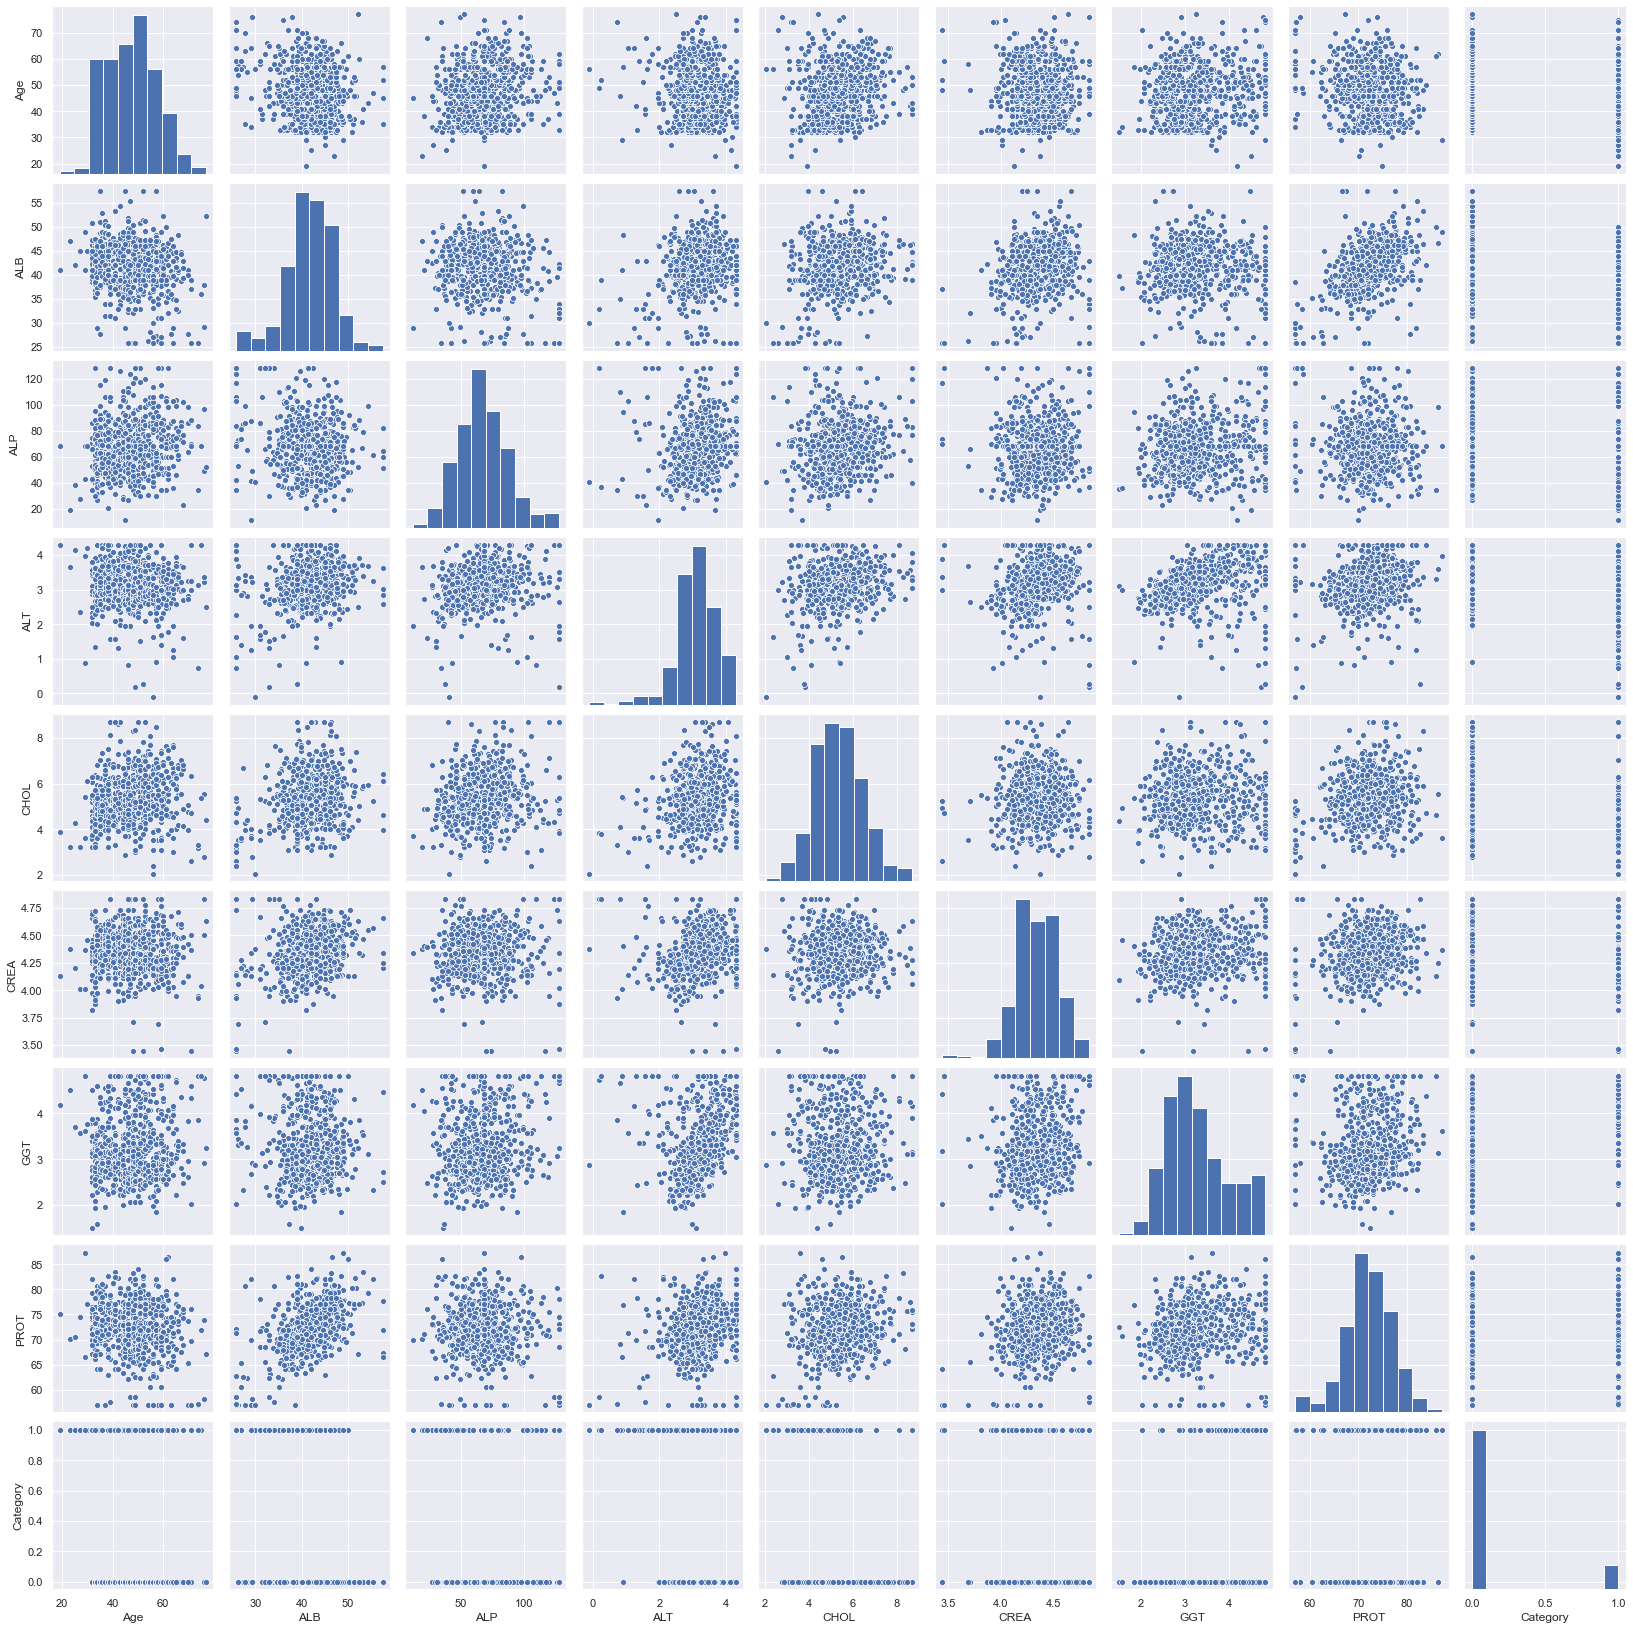

In [128]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

In [136]:
df

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
0,32,m,38.500000,52.500000,2.041220,3.23,4.663439,2.493205,69.0,0
1,32,m,38.500000,70.300000,2.890372,4.80,4.304065,2.747271,76.5,0
2,32,m,46.900000,74.700000,3.589059,5.20,4.454347,3.502550,79.3,0
3,32,m,43.200000,52.000000,3.421000,4.74,4.382027,3.520461,75.7,0
4,32,m,39.200000,74.100000,3.484312,4.32,4.330733,3.397858,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.000000,128.062025,1.774952,6.30,4.019980,4.814012,68.5,1
611,64,f,25.832629,102.800000,1.064711,3.02,4.143135,3.580737,71.3,1
612,64,f,29.000000,87.300000,1.252763,3.63,4.200205,4.162003,82.0,1
613,46,f,33.000000,68.283920,3.663562,4.20,3.951244,3.912023,71.0,1


In [140]:
# Function Encoding
# Кодирование качественных переменных
# Мужской пол (m) принимает значение 0, а женский (f) - 1
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [142]:
# Encoding categorical data
df = encoding_char(df)
df

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
0,32,0,38.500000,52.500000,2.041220,3.23,4.663439,2.493205,69.0,0
1,32,0,38.500000,70.300000,2.890372,4.80,4.304065,2.747271,76.5,0
2,32,0,46.900000,74.700000,3.589059,5.20,4.454347,3.502550,79.3,0
3,32,0,43.200000,52.000000,3.421000,4.74,4.382027,3.520461,75.7,0
4,32,0,39.200000,74.100000,3.484312,4.32,4.330733,3.397858,68.7,0
...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.000000,128.062025,1.774952,6.30,4.019980,4.814012,68.5,1
611,64,1,25.832629,102.800000,1.064711,3.02,4.143135,3.580737,71.3,1
612,64,1,29.000000,87.300000,1.252763,3.63,4.200205,4.162003,82.0,1
613,46,1,33.000000,68.283920,3.663562,4.20,3.951244,3.912023,71.0,1


In [309]:
df.describe()

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.386992,41.636426,67.485539,3.111307,5.365057,4.341553,3.272910,72.134702,0.133333
std,10.055105,0.487458,5.267459,20.190873,0.619070,1.106919,0.204869,0.704507,5.031554,0.340211
min,19.000000,0.000000,25.832629,11.300000,-0.105361,2.044296,3.447161,1.504077,57.039034,0.000000
25%,39.000000,0.000000,38.800000,52.950000,2.797281,4.620000,4.204693,2.753661,69.300000,0.000000
50%,47.000000,0.000000,41.900000,66.700000,3.135494,5.310000,4.343805,3.148453,72.200000,0.000000
75%,54.000000,1.000000,45.200000,79.300000,3.498020,6.055000,4.477337,3.693867,75.400000,0.000000
max,77.000000,1.000000,57.438924,128.062025,4.284129,8.685818,4.831502,4.814012,87.229378,1.000000


In [ ]:
"LOGISTIC REGRESSION" 

In [171]:
# Для классификации в качестве зависимой переменной будет использовать последний столбец  "Category"
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [172]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [173]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.545765
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.371  
Dependent Variable: y                AIC:              555.0328
Date:               2020-10-29 17:23 BIC:              592.8192
No. Observations:   492              Log-Likelihood:   -268.52 
Df Model:           8                LL-Null:          -195.80 
Df Residuals:       483              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1       0.0898     0.1116    0.8042   0.4213   -0.1290    0.3085
x2      -0.1661     0.1271   -1.3068   0.1913   -0.4152    0.0830
x3      -0.4301  

In [174]:
# Среди всех переменных значимыми являются перменные x3(ALB), x5(ALT), x6(CHOL), x8(GGT), x9(PROT)
# Преобразуем обучающую и тестовую выборку, оставив в ней только значимые переменные
# Features selection
X_train = X_train[:,[2,4,5,7,8]]
X_test = X_test[:,[2,4,5,7,8]]

In [175]:
# Fitting Logistic Regression to the Training set (5 variables)
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [176]:
# Predicting the Test set results
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.926829268292683

In [177]:
# Уровень качества модели достаточно высокий, так как 92,68 % выборки верно описаны моделью.

In [178]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  8   7]]


In [179]:
# 8 положительных случаев ложно определены как отрицательные, 1 негативный случай определен как положительный. 

In [180]:
"K-Nearest Neighbors" 

'K-Nearest Neighbors'

Minimum error:- 0.056910569105691054 at K = 2


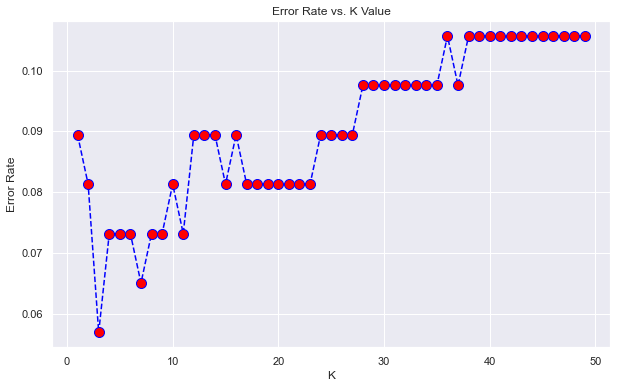

In [181]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [182]:
# Fitting K-NN to the Training set (5 variables)
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [183]:
# Predicting the Test set results
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.9186991869918699

In [184]:
# Качество K-NN-модели хуже, чем логистической регрессии (91,87 % выборки верно описаны моделью в отличие от 92,68 % в лог-й )

In [185]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  9   6]]


In [186]:
# 9 положительных случаев ложно определены как отрицательные, 1 негативный случай определен как положительный.

In [187]:
"SVM" 

'SVM'

In [188]:
# Fitting SVM to the Training set (5 variables)
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', random_state = 10).fit(X_train, y_train)

In [189]:
# Predicting the Test set results
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

0.959349593495935

In [190]:
# Качество SVM-модели лучше, чем логистической регрессии и К-ближайших соседей.

In [191]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   0]
 [  5  10]]


In [192]:
# 5 положительных случаев ложно определены как отрицательные, 0 негативных случаев определены как положительные. 

In [ ]:
"Naive Bayes" 

In [193]:
# Fitting Naive Bayes to the Training set (2 variables)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [194]:
# Predicting the Test set results
y_pred = nb.predict(X_test)
nb.score(X_test,y_test)

0.9349593495934959

In [ ]:
# Качество Naive Bayes-модели лучше, чем логистической регрессии, К-ближайших соседей, но хуже, чем в модели SVM

In [195]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  6   9]]


In [ ]:
# 6 положительных случаев ложно определены как отрицательные, 2 негативных случаz определены как положительные. 

In [196]:
"Classification Tree" 

'Classification Tree'

In [197]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

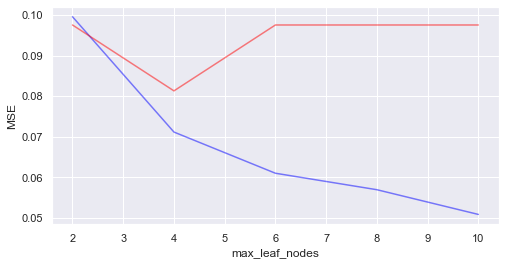

In [201]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [ ]:
# Оптимальное значение max_leaf_nodes = 4

In [204]:
# Fitting Classification Tree to the Training set (5 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [205]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.9024390243902439

In [206]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   5]
 [  7   8]]


In [ ]:
# 7 положительных случаев ложно определены как отрицательные, 5 негативных случаев определены как положительные. 

In [ ]:
"Classification Tree _ Random Tree" 

In [207]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

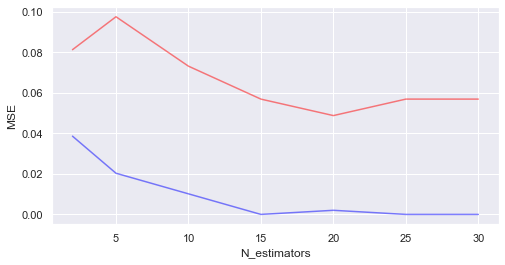

In [209]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20, 25, 30])

In [ ]:
# Оптимальное значение количесвта деревьев  = 20

In [210]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

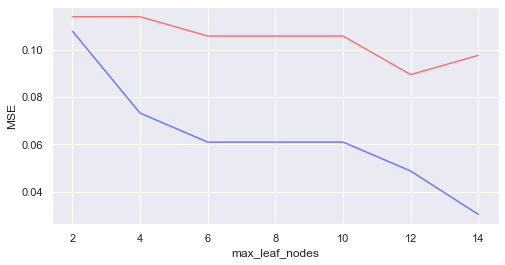

In [211]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10, 12, 14])

In [212]:
# Оптимальное значение max_leaf_nodes = 12

In [213]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, max_leaf_nodes = 12, random_state = 10).fit(X_train, y_train)

In [214]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test)

0.943089430894309

In [ ]:
# Качество модели превосходит качество всех рассматренных, кроме модели SVM, где точность составляла 95,9 %

In [215]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  6   9]]


In [ ]:
# 6 положительных случаев ложно определены как отрицательные, 1 негативный случай определен как положительный. 

In [ ]:
"Classification Neural Network" 

In [257]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [258]:
# Построим различные модели нейронных сетей для классификации, используя сужающие архитектуры

In [264]:
# Initialising the ANN 5-4-1
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(units = 4, activation = 'relu', input_dim = 5))

# Adding the output layer
cnn1.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [267]:
# Fitting the ANN to the Training set
cnn1.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7585 - accuracy: 0.4268
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.7099 - accuracy: 0.5467
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6585
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7480
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.8069
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.8476
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.8638
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.8699
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.8720
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8760
Epoch 11/

Epoch 83/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9431
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9431
Epoch 85/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.9431
Epoch 86/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9431
Epoch 87/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.9431
Epoch 88/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.9431
Epoch 89/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9431
Epoch 90/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1695 - accuracy: 0.9431
Epoch 91/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9431
Epoch 92/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1690 - accuracy: 0.9431


In [270]:
# Predicting the Test set results
y_pred = cnn1.predict(X_test)
y_pred = (y_pred > 0.5)

In [271]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  8   7]]


In [ ]:
# 8 положительных случаев ложно определены как отрицательные, 1 негативный случай определен как положительный. 

In [285]:
# Initialising the ANN 5-3-1
cnn2 = Sequential()

# Adding the input layer and the first hidden layer
cnn2.add(Dense(units = 3 , activation = 'relu', input_dim = 5))

# Adding the output layer
cnn2.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [286]:
# Fitting the ANN to the Training set
cnn2.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.7419
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.8415
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.8598
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.8740
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8882
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8943
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.9024
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.9024
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.9045
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.9085
Epoch 11/

Epoch 83/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9289
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9289
Epoch 85/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9289
Epoch 86/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9289
Epoch 87/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9289
Epoch 88/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9268
Epoch 89/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.9248
Epoch 90/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9248
Epoch 91/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9289
Epoch 92/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9289


In [287]:
# Predicting the Test set results
y_pred = cnn2.predict(X_test)
y_pred = (y_pred > 0.5)

In [288]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  7   8]]


In [ ]:
# 7 положительных случаев ложно определены как отрицательные, 2 негативных случая определены как положительные.
# Здесь немного больше ошибок (9), чем в архитектуре 5-4-1

In [297]:
# Initialising the ANN 5-4-3-1
cnn3 = Sequential()

# Adding the input layer and the first hidden layer
cnn3.add(Dense(units = 4 , activation = 'relu', input_dim = 5))

# Adding the hidden layer
cnn3.add(Dense(units = 3, activation = 'relu'))

# Adding the output layer
cnn3.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [298]:
# Fitting the ANN to the Training set
cnn3.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.8638
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.8638
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.8638
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.8638
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.8638
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8638
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8638
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8638
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8638
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8638
Epoch 11/

50/50 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9350
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.9350
Epoch 85/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9350
Epoch 86/100
50/50 [==============================] - 0s 997us/step - loss: 0.1748 - accuracy: 0.9370
Epoch 87/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9350
Epoch 88/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9390
Epoch 89/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9350
Epoch 90/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9350
Epoch 91/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.9350
Epoch 92/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9390
Epoch 93/10

In [299]:
# Predicting the Test set results
y_pred = cnn3.predict(X_test)
y_pred = (y_pred > 0.5)

In [300]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   4]
 [  6   9]]


In [ ]:
# 6 положительных случаев ложно определены как отрицательные, 4 негативных случая определены как положительные.
# Здесь немного больше ошибок (10), чем в архитектуре 5-4-1 и 5-3-1

In [301]:
# Initialising the ANN 5-8-1
cnn4 = Sequential()

# Adding the input layer and the first hidden layer
cnn4.add(Dense(units = 8 , activation = 'relu', input_dim = 5))

# Adding the output layer
cnn4.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [302]:
# Fitting the ANN to the Training set
cnn4.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 765us/step - loss: 0.6528 - accuracy: 0.6260
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7358
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.8150
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.8618
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.8780
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8862
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8882
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8984
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.9004
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.9106
Epoch 1

Epoch 83/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1678 - accuracy: 0.9370
Epoch 84/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1672 - accuracy: 0.9350
Epoch 85/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.9350
Epoch 86/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9370
Epoch 87/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1670 - accuracy: 0.9370
Epoch 88/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.9390
Epoch 89/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9390
Epoch 90/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9411
Epoch 91/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9411
Epoch 92/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9390


In [303]:
# Predicting the Test set results
y_pred = cnn4.predict(X_test)
y_pred = (y_pred > 0.5)

In [304]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   1]
 [  5  10]]


In [ ]:
# 5 положительных случаев ложно определены как отрицательные, 1 негативный случая определен как положительные.
# Здесь немного меньше ошибок (6), чем в архитектуре 5-4-1 , 5-3-1 и 5-4-3-1
# Делаем вывод, что данная архитектрура дает лучший результат

In [277]:
"Clusterisation" 

'Clusterisation'

In [278]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [279]:
# Importing the dataset
df = pd.read_excel('kr2.xlsx', encoding='ISO-8859-1')
df = df.drop(['Category'], axis=1)

In [280]:
df

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,6.30,55.7,650.9,68.5
611,64,f,24.0,102.8,2.9,3.02,63.0,35.9,71.3
612,64,f,29.0,87.3,3.5,3.63,66.7,64.2,82.0
613,46,f,33.0,NaN,39.0,4.20,52.0,50.0,71.0


C:\Users\ztnik\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


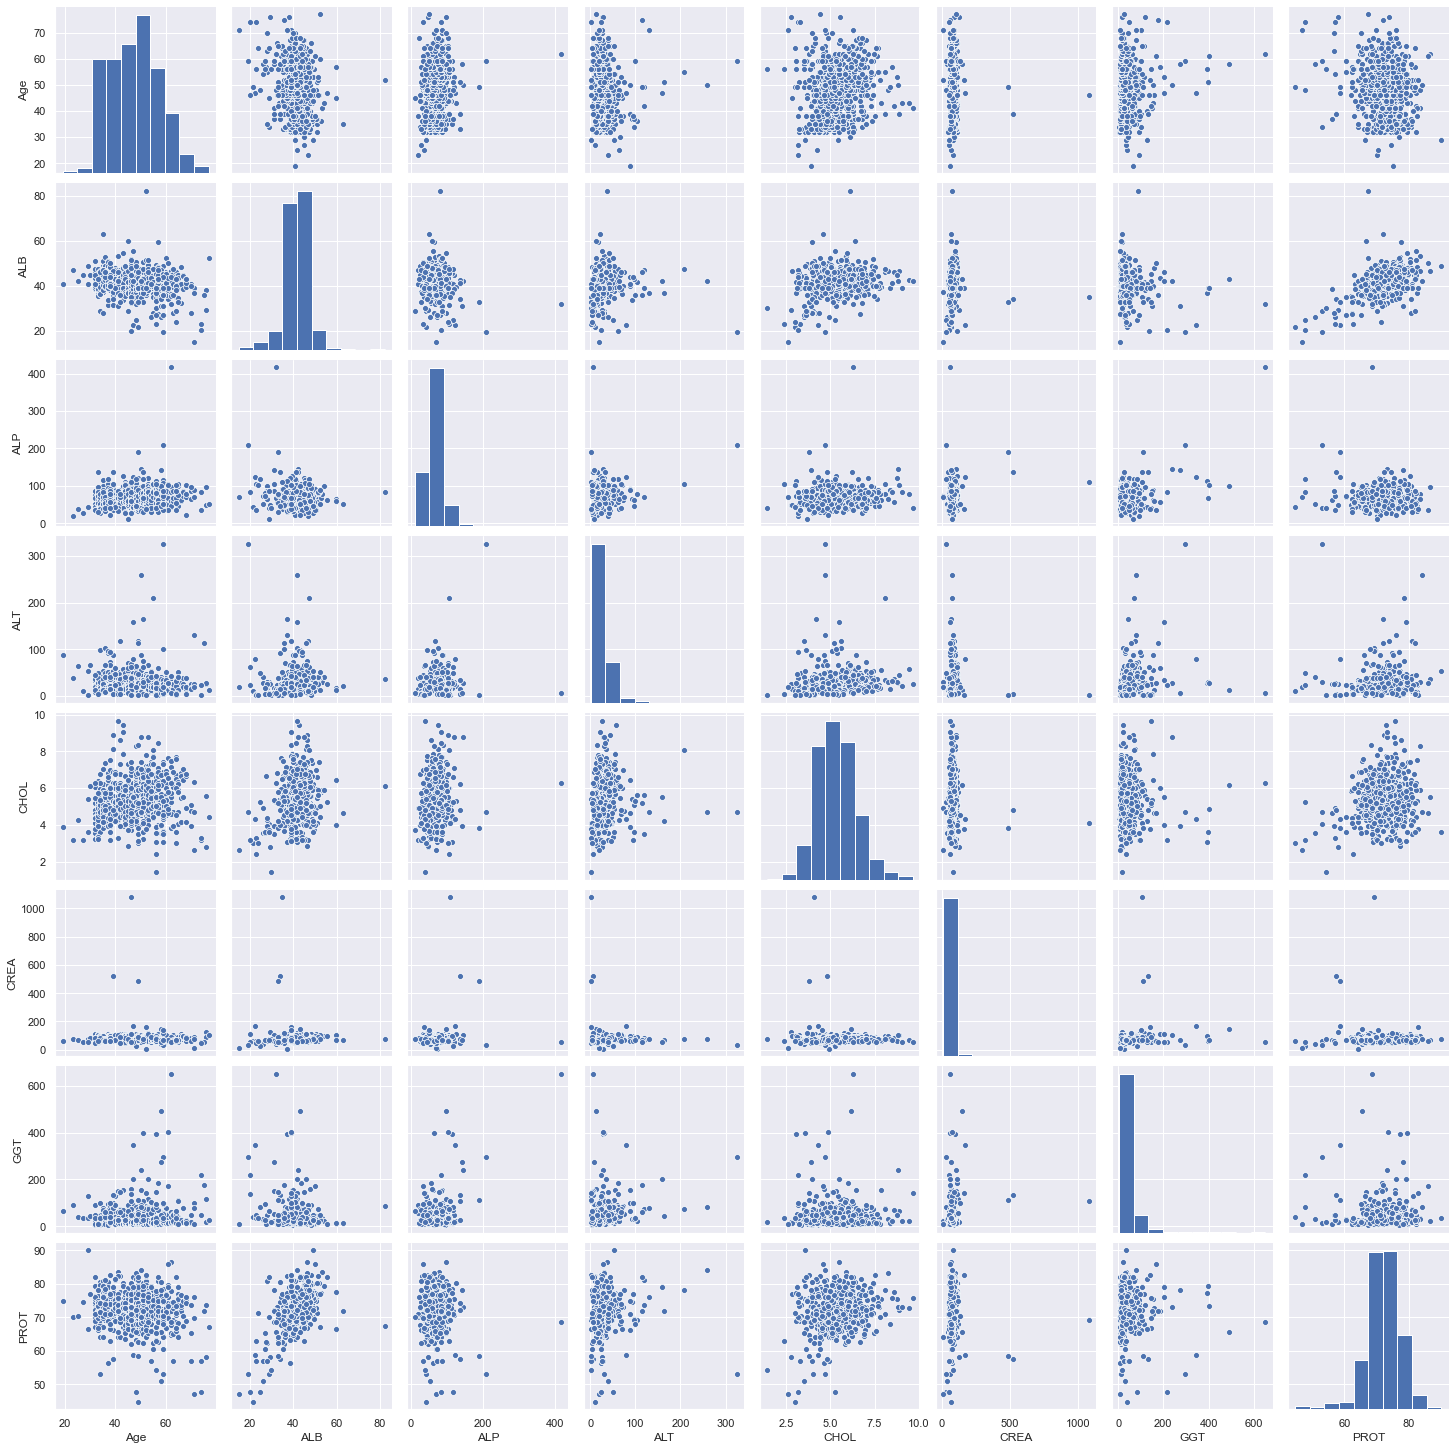

In [281]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

In [282]:
# Cheking NaN
# Видим, что пропущенные значения присутствуют в переменных ALB, ALP, ALT, CHOL, PROT
nan_by_column=df.isnull().sum()
print(nan_by_column)

Age      0
Sex      0
ALB      1
ALP     18
ALT      1
CHOL    10
CREA     0
GGT      0
PROT     1
dtype: int64


In [283]:
# Taking care of missing data
# Избавимся от отствующих значений заменив их на средние значения
from sklearn.impute import SimpleImputer
df[['ALB']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALB']])
df[['ALP']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALP']])
df[['ALT']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALT']])
df[['CHOL']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['CHOL']])
df[['PROT']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['PROT']])

In [284]:
#  Исходя из графиков распределения и таблицы статических показателей,видим, что в некоторых
# переменных (ALB,ALP,ALT,CREA,GGT) присутствуют выбросы
# "Загоним" все значения в три сигма
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for ALB in num_var:
        df[ALB] = df[ALB].apply(lambda y: df[ALB].mean()-3*df[ALB].std() 
                            if y < df[ALB].mean()-3*df[ALB].std() else y)
        df[ALB] = df[ALB].apply(lambda y: df[ALB].mean()+3*df[ALB].std() 
                            if y > df[ALB].mean()+3*df[ALB].std() else y)
    for ALP in num_var:
        df[ALP] = df[ALP].apply(lambda y: df[ALP].mean()-3*df[ALP].std() 
                            if y < df[ALP].mean()-3*df[ALP].std() else y)
        df[ALP] = df[ALP].apply(lambda y: df[ALP].mean()+3*df[ALP].std() 
                            if y > df[ALP].mean()+3*df[ALP].std() else y) 
    for ALT in num_var:
        df[ALT] = df[ALT].apply(lambda y: df[ALT].mean()-3*df[ALT].std() 
                            if y < df[ALT].mean()-3*df[ALT].std() else y)
        df[ALT] = df[ALT].apply(lambda y: df[ALT].mean()+3*df[ALT].std() 
                            if y > df[ALT].mean()+3*df[ALT].std() else y) 
    for CREA in num_var:
        df[CREA] = df[CREA].apply(lambda y: df[CREA].mean()-3*df[CREA].std() 
                            if y < df[CREA].mean()-3*df[CREA].std() else y)
        df[CREA] = df[CREA].apply(lambda y: df[CREA].mean()+3*df[CREA].std() 
                            if y > df[CREA].mean()+3*df[CREA].std() else y)
    for GGT in num_var:
        df[GGT] = df[GGT].apply(lambda y: df[GGT].mean()-3*df[GGT].std() 
                            if y < df[GGT].mean()-3*df[GGT].std() else y)
        df[GGT] = df[GGT].apply(lambda y: df[GGT].mean()+3*df[GGT].std() 
                            if y > df[GGT].mean()+3*df[GGT].std() else y)    
        
    return(df)

In [285]:
# Outliers
df = outliers(df)
df.describe()

,Age,ALB,ALP,ALT,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.636426,67.485539,26.522075,5.365057,78.407848,34.595895,72.134702
std,10.055105,5.267459,20.190873,15.247022,1.106919,15.655805,29.119238,5.031554
min,19.000000,25.832629,11.300000,0.900000,2.044296,31.411085,4.500000,57.039034
25%,39.000000,38.800000,52.950000,16.400000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,6.055000,88.000000,40.200000,75.400000
max,77.000000,57.438924,128.062025,72.539305,8.685818,125.399153,123.225026,87.229378


In [286]:
# Исходя из графиков распределения, видим, что переменные ALT, CREA и GGT имеют ненормальное распределение.
# Прологарифмируем их
df['ALT'] = np.log(df['ALT'])
df['CREA'] = np.log(df['CREA'])
df['GGT'] = np.log(df['GGT'])

In [287]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [288]:
# Encoding categorical data
df = encoding_char(df)

In [289]:
df

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT
0,32,0,38.500000,52.500000,2.041220,3.23,4.663439,2.493205,69.0
1,32,0,38.500000,70.300000,2.890372,4.80,4.304065,2.747271,76.5
2,32,0,46.900000,74.700000,3.589059,5.20,4.454347,3.502550,79.3
3,32,0,43.200000,52.000000,3.421000,4.74,4.382027,3.520461,75.7
4,32,0,39.200000,74.100000,3.484312,4.32,4.330733,3.397858,68.7
...,...,...,...,...,...,...,...,...,...
610,62,1,32.000000,128.062025,1.774952,6.30,4.019980,4.814012,68.5
611,64,1,25.832629,102.800000,1.064711,3.02,4.143135,3.580737,71.3
612,64,1,29.000000,87.300000,1.252763,3.63,4.200205,4.162003,82.0
613,46,1,33.000000,68.283920,3.663562,4.20,3.951244,3.912023,71.0


In [290]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Age','Sex','ALB','ALP','ALT','CHOL','CREA','GGT','PROT'])

In [291]:
"K-Means Clustering" 

'K-Means Clustering'

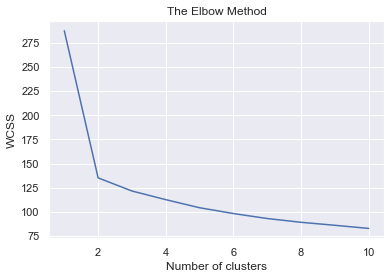

In [292]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

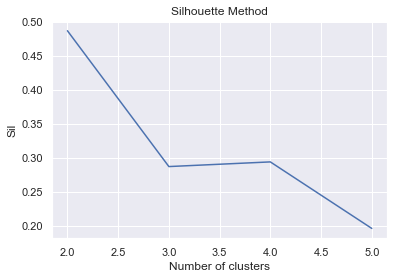

2:0.48698300729627364
3:0.28708539531389127
4:0.29395326622757395
5:0.19606316003909824


In [293]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [294]:
# Лучше всего выделить 2 кластера

In [295]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALB','ALP','ALT','CHOL','CREA','GGT','PROT'])

,Age,Sex,ALB,ALP,ALT,CHOL,CREA,GGT,PROT
0,0.486417,-1.387779e-15,0.521490,0.483679,0.760638,0.495835,0.697933,0.583379,0.508293
1,0.495146,1.000000e+00,0.466011,0.477266,0.688733,0.506598,0.563939,0.456819,0.486906


In [296]:
# Показатели Age, ALP,ALB, ALT, CHOL, CREA, GGT, PROT слабо варьируются по кластерам 
# Делаем вывод, что лишь переменная Sex дает нормальную вариацию

In [297]:
# Less features
# Оставим только значимую переменную Sex 
X = df.iloc[:, [1]]

In [298]:
# Fitting K-Means to the dataset
# Поэксперементируем с 2-мя кластерами и значимой переменной Sex 
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex'])

,Sex
0,0.0
1,1.0


In [299]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [300]:
"Hierarchical Clustering" 

'Hierarchical Clustering'

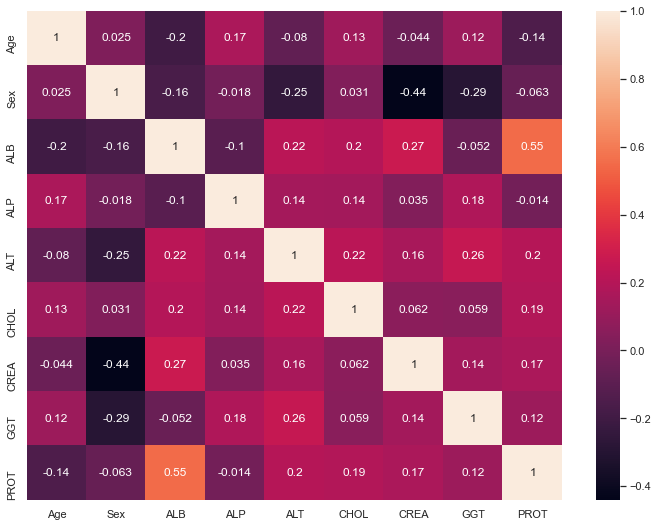

In [301]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

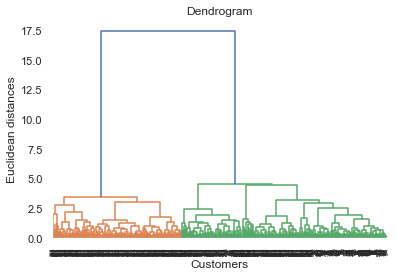

In [302]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [303]:
# Исходя из диаграммы примем решение о 2 кластерах как оптимальном значении

In [304]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [305]:
# Less features
X = df.iloc[:, [1]]

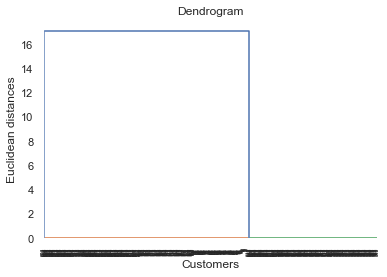

In [306]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [307]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [308]:
# Importing km clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [309]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

1.0

In [310]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust-hc.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [311]:
"SOM" 

'SOM'

In [312]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [313]:
df

array([[-1.53361617, -0.79454373, -0.59591909, ...,  1.57245829,
        -1.10763944, -0.62351591],
       [-1.53361617, -0.79454373, -0.59591909, ..., -0.18313425,
        -0.746717  ,  0.8682906 ],
       [-1.53361617, -0.79454373,  1.00007579, ...,  0.55101545,
         0.32622352,  1.4252317 ],
       ...,
       [ 1.65143725,  1.25858397, -2.4009133 , ..., -0.69050565,
         1.26303526,  1.96228204],
       [-0.1401553 ,  1.25858397, -1.64091574, ..., -1.90671629,
         0.90791629, -0.22570084],
       [ 1.15377266,  1.25858397, -1.07091756, ..., -0.66858276,
         0.36004865, -0.82242345]])

In [314]:
# Берем значимую переменную Sex
X = df[:, [1]]

In [315]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 10, X, PBC=True)
net.train(0.01, 2000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


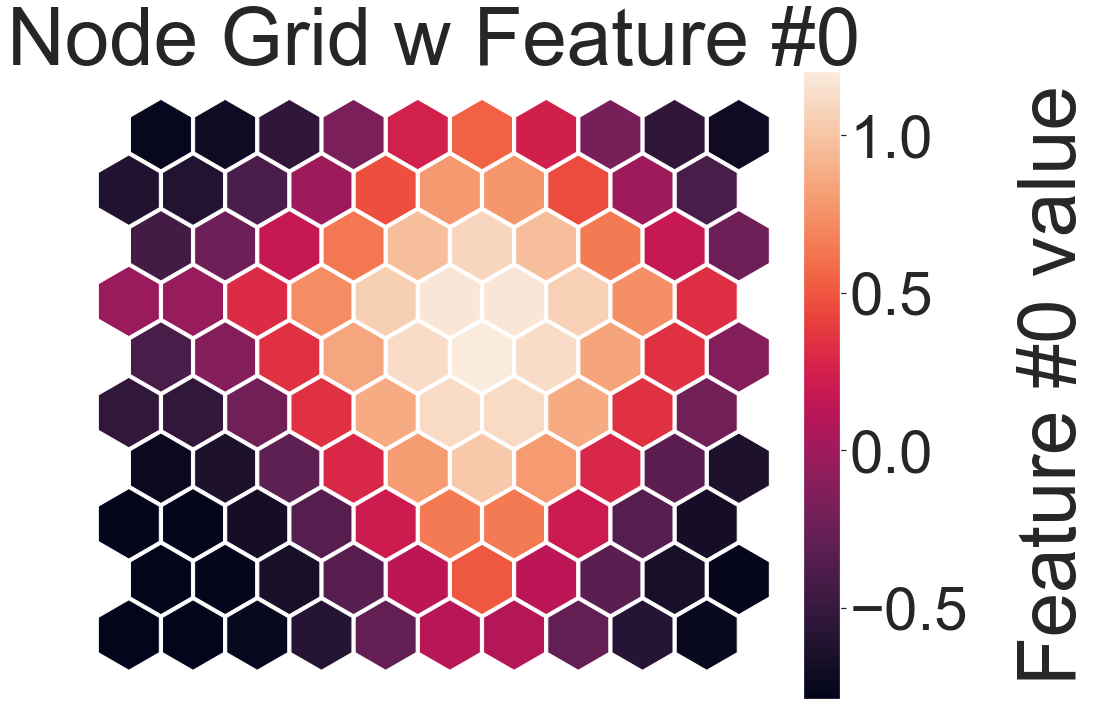

In [316]:
net.nodes_graph(colnum=0)

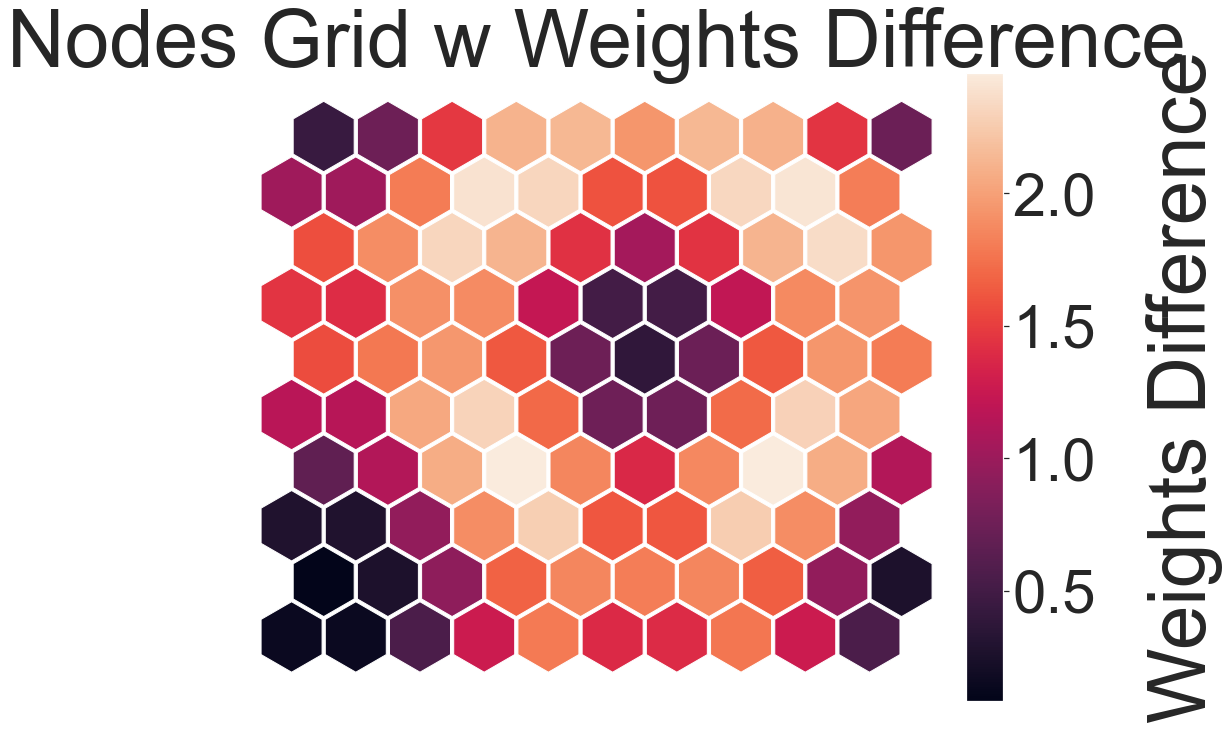

In [318]:
net.diff_graph()

In [319]:
# Есть ячейки сильно отдаленные от остального множества объектов

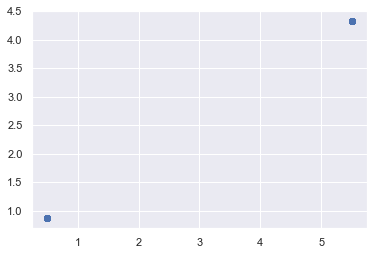

In [320]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [321]:
# Выделяются 2 кластера

In [322]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

In [323]:
# Importing hc clusters
import pickle
input = open('clust-hc.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [324]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,kmeans.labels_)

1.0

In [325]:
# Иерархическая кластеризация и К-средние пересекаются на 100% 

In [326]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

1.0

In [ ]:
# По всем видам кластеризации делаем вывод, что оптимальное число кластеров по всем моделям равно 2.